In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/artemedius/repo/main/superstore_sales.csv'
df = pd.read_csv(url, index_col=0, encoding= "unicode_escape")
df.columns = df.columns.str.lower()
df[['order date','ship date']] = df[['order date','ship date']].apply(pd.to_datetime)
df = df.reset_index().drop(['Row ID', 'country'], axis=1)

##### Top ten states by total sales

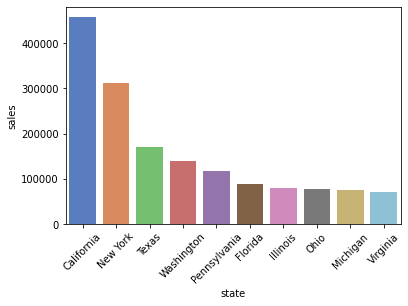

In [158]:
sbs = pd.DataFrame(df.groupby(['state'])['sales'].sum()).reset_index() #sales by state (SBS)
sbshort = sbs.sort_values(by='sales', ascending=False)[0:10]
palette = sns.color_palette('muted')
ax = sns.barplot(x='state', y='sales', data=sbshort, palette=palette)
ax = ax.tick_params(axis='x', rotation=45)

Text(0.5, 1.0, 'Percentage of total sales by region')

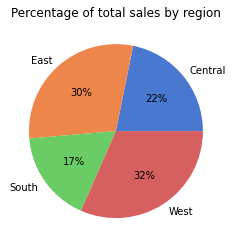

In [159]:
#sales by region
sbr = pd.DataFrame(df.groupby(['region'])['sales'].sum()).reset_index()
sbr['percent'] = sbr['sales']/sbr['sales'].sum()
plt.pie(sbr['percent'], labels=sbr['region'], colors=palette, autopct='%.0f%%')
plt.title('Percentage of total sales by region')

##### Total sales by customer segment

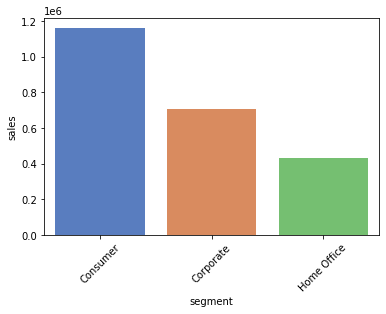

In [160]:
#sales by customer segment
sbs = pd.DataFrame(df.groupby(['segment'])['sales'].sum()).reset_index()
sbshort = sbs.sort_values(by='sales', ascending=False)
ax = sns.barplot(x='segment', y='sales', data=sbshort, palette=palette)
ax = ax.tick_params(axis='x', rotation=45)

##### Top ten sub-categories by total sales

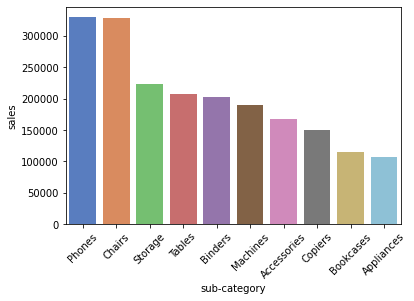

In [161]:
#sales by sub-category
sbs = pd.DataFrame(df.groupby(['sub-category'])['sales'].sum()).reset_index()
sbshort = sbs.sort_values(by='sales', ascending=False)[0:10]
ax = sns.barplot(x='sub-category', y='sales', data=sbshort, palette=palette)
ax = ax.tick_params(axis='x', rotation=45)

Since phones and chairs sell the most, what are the best-selling brands?

C:\Users\a.fedosov\AppData\Local\Temp\ipykernel_15140\2678621253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phones['brand'] = phones['product name'].apply(lambda x: f'{get_brand(x)}')


Text(0.5, 1.0, 'Top selling phone brands')

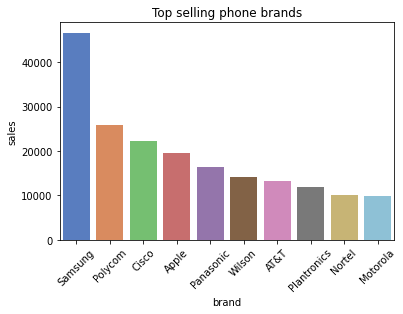

In [162]:
phones = df.loc[df['sub-category'] == 'Phones']

def get_brand(x):
    return x.split(' ')[0].strip(' ')
phones['brand'] = phones['product name'].apply(lambda x: f'{get_brand(x)}')
brands = pd.DataFrame(phones.groupby('brand')['sales'].sum()).reset_index()
brandshort = brands.sort_values(by='sales', ascending=False)[0:10]
brandshort['percent'] = brandshort['sales']/brandshort['sales'].sum()


#top-selling brands barchart
ax = sns.barplot(x='brand', y='sales', data=brandshort, palette=palette)
ax = ax.tick_params(axis='x', rotation=45)
plt.title('Top selling phone brands')

C:\Users\a.fedosov\AppData\Local\Temp\ipykernel_15140\1907659478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chairs['brand'] = chairs['product name'].apply(lambda x: f'{get_brand(x)}')


Text(0.5, 1.0, 'Top selling chair brands')

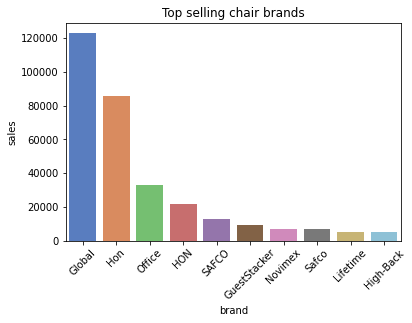

In [163]:
chairs = df.loc[df['sub-category'] == 'Chairs']

chairs['brand'] = chairs['product name'].apply(lambda x: f'{get_brand(x)}')
brands = pd.DataFrame(chairs.groupby('brand')['sales'].sum()).reset_index()
brandshort = brands.sort_values(by='sales', ascending=False)[0:10]
brandshort['percent'] = brandshort['sales']/brandshort['sales'].sum()


#top-selling brands barchart
ax = sns.barplot(x='brand', y='sales', data=brandshort, palette=palette)
ax = ax.tick_params(axis='x', rotation=45)
plt.title('Top selling chair brands')

In [164]:
chairs

,order id,order date,ship date,ship mode,customer id,customer name,segment,city,state,postal code,region,product id,category,sub-category,product name,sales,quantity,discount,profit,brand
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,Hon
23,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,Global
39,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,Houston,Texas,77041,Central,FUR-CH-10004218,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",212.058,3,0.3,-15.1470,Global
52,CA-2015-115742,2015-04-18,2015-04-22,Standard Class,DP-13000,Darren Powers,Consumer,New Albany,Indiana,47150,Central,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",89.990,1,0.0,17.0981,Global
57,CA-2016-111682,2016-06-17,2016-06-18,First Class,TB-21055,Ted Butterfield,Consumer,Troy,New York,12180,East,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,319.410,5,0.1,7.0980,Novimex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,US-2016-115441,2016-07-25,2016-07-28,Second Class,SH-19975,Sally Hughsby,Corporate,Milwaukee,Wisconsin,53209,Central,FUR-CH-10004626,Furniture,Chairs,Office Star Flex Back Scooter Chair with Alumi...,403.560,4,0.0,96.8544,Office
9907,US-2015-129007,2015-09-13,2015-09-15,First Class,KD-16615,Ken Dana,Corporate,Anaheim,California,92804,West,FUR-CH-10000155,Furniture,Chairs,Global Comet Stacking Armless Chair,717.720,3,0.2,71.7720,Global
9912,CA-2015-132388,2015-10-10,2015-10-12,First Class,KN-16390,Katherine Nockton,Corporate,Santa Barbara,California,93101,West,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",362.136,3,0.2,-54.3204,Global
9919,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,Bryan,Texas,77803,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,528.430,5,0.3,-143.4310,Novimex
